In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os

import tensorflow as tf
import numpy as np

SEED = 1234
tf.random.set_seed(SEED)  

#TO RUN THIS NOTEBOOK YOU HAVE TO CONSIDER AS TRAINING DATASET DIRECTORY JUST THE BIPBIP ONE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/Bipbip.zip

Archive:  /content/drive/MyDrive/Bipbip.zip
   creating: Bipbip/
   creating: Bipbip/Haricot/
   creating: Bipbip/Haricot/Images/
  inflating: Bipbip/Haricot/Images/Bipbip_haricot_im_00321.jpg  
  inflating: Bipbip/Haricot/Images/Bipbip_haricot_im_00391.jpg  
  inflating: Bipbip/Haricot/Images/Bipbip_haricot_im_00451.jpg  
  inflating: Bipbip/Haricot/Images/Bipbip_haricot_im_00511.jpg  
  inflating: Bipbip/Haricot/Images/Bipbip_haricot_im_00651.jpg  
  inflating: Bipbip/Haricot/Images/Bipbip_haricot_im_00801.jpg  
  inflating: Bipbip/Haricot/Images/Bipbip_haricot_im_00871.jpg  
  inflating: Bipbip/Haricot/Images/Bipbip_haricot_im_01021.jpg  
  inflating: Bipbip/Haricot/Images/Bipbip_haricot_im_01091.jpg  
 extracting: Bipbip/Haricot/Images/Bipbip_haricot_im_01271.jpg  
 extracting: Bipbip/Haricot/Images/Bipbip_haricot_im_01451.jpg  
 extracting: Bipbip/Haricot/Images/Bipbip_haricot_im_01541.jpg  
 extracting: Bipbip/Haricot/Images/Bipbip_haricot_im_01631.jpg  
 extracting: Bipbip/Haric

In [4]:

cwd = os.getcwd()
cwd

'/content'

In [5]:
import math
from PIL import Image
import numpy as np
import os
# FUNZIONI VARIE PER CROPS:

def save_crops(path_img, save_dir, tipo, size=512, overlap=10):
    img = Image.open(path_img)
    name = os.path.normpath(path_img)
    name = os.path.basename(name)
    name = os.path.splitext(name)[0]
    width, height = img.size
    
    # box =  left, upper, right, and lower
    x = 0
    y = 0
    arrived_y = 0

    while arrived_y + size <= height:
        arrived_x = 0
        x = 0
        while arrived_x + size <= width:
            box = (arrived_x, arrived_y, arrived_x + size, arrived_y + size)
            one_crop = img.crop(box)
            if (tipo == 'img'):
              name_part = "-" + str(x) + "-" + str(y) + ".jpg"
              one_crop.save(os.path.join(save_dir, name + name_part))
            else:
              if (tipo == 'mask'):
                name_part = "-" + str(x) + "-" + str(y) + ".png"
                one_crop.save(os.path.join(save_dir, name + name_part))
              else:
                print('tipo sbagliato!! ERROREE no salvataggio')
            x = x+1
            arrived_x = arrived_x + size - overlap
        if width - arrived_x >= 1:
            # creo img tutta nera
            black_img = np.zeros([size,size,3],dtype=np.uint8)
            black_img = Image.fromarray(black_img)
            box = (arrived_x, arrived_y, width, arrived_y + size)
            one_crop = img.crop(box)
            black_img.paste(one_crop, (0, 0))
            if (tipo == 'img'):
              black_img.save(os.path.join(save_dir, name + "-" + str(x) + "-" + str(y) + ".jpg"))
            else:
              if (tipo == 'mask'):
                black_img.save(os.path.join(save_dir, name + "-" + str(x) + "-" + str(y) + ".png"))
              else:
                print('tipo sbagliato!! ERROREE no salvataggio')
        arrived_y = arrived_y + size - overlap
        y = y+1
                                  
    x = 0
    if height - arrived_y >= 1:
        arrived_x = 0
        while arrived_x + size <= width:
            black_img = np.zeros([size,size,3],dtype=np.uint8)
            black_img = Image.fromarray(black_img)
            box = (arrived_x, arrived_y, arrived_x + size, height)
            one_crop = img.crop(box)
            black_img.paste(one_crop, (0, 0))
            if (tipo == 'img'):              
              black_img.save(os.path.join(save_dir, name + "-" + str(x) + "-" + str(y) + ".jpg"))
            else:
              if (tipo == 'mask'):
                black_img.save(os.path.join(save_dir, name + "-" + str(x) + "-" + str(y) + ".png"))
              else:
                print('tipo sbagliato!! ERROREE no salvataggio')
            arrived_x = arrived_x + size - overlap
            x = x+1
        if width - arrived_x >= 1:
            # creo img tutta nera
            black_img = np.zeros([size,size,3],dtype=np.uint8)
            black_img = Image.fromarray(black_img)
            box = (arrived_x, arrived_y, width, height)
            one_crop = img.crop(box)
            black_img.paste(one_crop, (0, 0))
            if (tipo == 'img'):    
              black_img.save(os.path.join(save_dir, name + "-" + str(x) + "-" + str(y) + ".jpg"))
            else:
              if (tipo == 'mask'):
                black_img.save(os.path.join(save_dir, name + "-" + str(x) + "-" + str(y) + ".png"))
              else:
                print('tipo sbagliato!! ERROREE no salvataggio')
                           
    return

def takeSecond(elem):
    return elem[1]
                           
def crops_reconstruct(imgs_path, save_dir, final_size, size = 256, overlap = 10):
    images = []
    for filename in os.listdir(imgs_path):
        name = os.path.splitext(filename)[0]
        elem = name.split("-") # ottengo [name, x, y] in stringhe
        images.append(elem)
    i = 0
    list_same_img = images         
    black_img = np.zeros([final_size[1],final_size[0],3],dtype=int)   
    black_img = Image.fromarray(black_img, 'RGB')
    save_img_name = list_same_img[0][0]
    x = 0
    y = 0
                        
    number_of_y = len(set([img[2] for img in list_same_img])) # valore in pos 2 è y
    for y_number in range (0, number_of_y):
        x = 0
        list_crops_same_row = []
        for elem in list_same_img:
            if elem[2] == str(y_number):
                list_crops_same_row.append(elem)
                        
        list_crops_same_row.sort(key=takeSecond)

        for crop in list_crops_same_row:        
            string = crop[0] + "-" + crop[1] + "-" + crop[2] + ".png"
            take_crop = Image.open(os.path.join(imgs_path, string))
            black_img.paste(take_crop, (x, y))
            x = x + size - overlap
    
        y = y + size - overlap
    #black_img.crop(final)
    black_img.save(os.path.join(save_dir, save_img_name + ".png"))
    return black_img

#[216, 67, 82]
def make_equal(img_arr, t1=10, t2=240):
    img_arr = img_arr.copy()

    for i in range (0,img_arr.shape[0]):
        for j in range (0,img_arr.shape[1]):
            if (img_arr[i][j][2]) > t1 and img_arr[i][j][2] < t2:
              if (img_arr[i][j][1]) > t1 and img_arr[i][j][1] < t2:
                img_arr[i][j][0] = 216
                img_arr[i][j][1] = 67
                img_arr[i][j][2] = 82
            if (img_arr[i][j][0]) >= t2:
                if (img_arr[i][j][1]) >= t2:
                    if (img_arr[i][j][2]) >= t2:
                        img_arr[i][j][0] = 255
                        img_arr[i][j][1] = 255
                        img_arr[i][j][2] = 255
            if (img_arr[i][j][0]) <= t1:
                if (img_arr[i][j][1]) <= t1:
                    if (img_arr[i][j][2]) <= t1:
                        img_arr[i][j][0] = 0
                        img_arr[i][j][1] = 0
                        img_arr[i][j][2] = 0

    return img_arr

In [6]:
from PIL import Image

test_dir = os.path.join(cwd,"Test_Dev")

crops = os.path.join(cwd, "Crops")
if not os.path.exists(crops):
    os.makedirs(crops)
save_crops_dir = os.path.join(cwd, "Crops/Images")
if not os.path.exists(save_crops_dir):
    os.makedirs(save_crops_dir)
save_crops_masks_dir = os.path.join(cwd, "Crops/Masks")
if not os.path.exists(save_crops_masks_dir):
    os.makedirs(save_crops_masks_dir)
    
json_dir = os.path.join(cwd, "CONTENT")
if not os.path.exists(json_dir):
    os.makedirs(json_dir)

In [7]:
import os
import json
import numpy as np
from PIL import Image

def rle_encode(img):
    '''
    img: numpy array, 1 - foreground, 0 - background
    Returns run length as string formatted
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [8]:
# croppiamo le immagini del dataset e le salviamo in Crops/Images, che diventerà il nuovo dataset di riferimento
for (root,dirs,files) in os.walk('/content/Bipbip/Haricot/Images'):
  for file in files:
    print(root + file)
    # tipo = img così vengono salvate con estensione .jpg come le originali (vedi funzione per capire)
    save_crops(root + '/' + file, '/content/Crops/Images', size=512, overlap=20, tipo = 'img')

/content/Bipbip/Haricot/ImagesBipbip_haricot_im_05741.jpg
/content/Bipbip/Haricot/ImagesBipbip_haricot_im_00321.jpg
/content/Bipbip/Haricot/ImagesBipbip_haricot_im_05481.jpg
/content/Bipbip/Haricot/ImagesBipbip_haricot_im_03571.jpg
/content/Bipbip/Haricot/ImagesBipbip_haricot_im_03111.jpg
/content/Bipbip/Haricot/ImagesBipbip_haricot_im_03751.jpg
/content/Bipbip/Haricot/ImagesBipbip_haricot_im_07941.jpg
/content/Bipbip/Haricot/ImagesBipbip_haricot_im_05351.jpg
/content/Bipbip/Haricot/ImagesBipbip_haricot_im_01451.jpg
/content/Bipbip/Haricot/ImagesBipbip_haricot_im_07701.jpg
/content/Bipbip/Haricot/ImagesBipbip_haricot_im_04301.jpg
/content/Bipbip/Haricot/ImagesBipbip_haricot_im_03281.jpg
/content/Bipbip/Haricot/ImagesBipbip_haricot_im_03841.jpg
/content/Bipbip/Haricot/ImagesBipbip_haricot_im_04851.jpg
/content/Bipbip/Haricot/ImagesBipbip_haricot_im_08371.jpg
/content/Bipbip/Haricot/ImagesBipbip_haricot_im_02301.jpg
/content/Bipbip/Haricot/ImagesBipbip_haricot_im_08221.jpg
/content/Bipbi

In [9]:
# idem per le maschere
for (root,dirs,files) in os.walk('/content/Bipbip/Haricot/Masks'):
  for file in files:
    print(root + file)
    # tipo = mask così vengono salvate con estensione .png come le originali
    save_crops(root + '/' + file, '/content/Crops/Masks', size=512, overlap=20, tipo = 'mask')

/content/Bipbip/Haricot/MasksBipbip_haricot_im_02651.png
/content/Bipbip/Haricot/MasksBipbip_haricot_im_01631.png
/content/Bipbip/Haricot/MasksBipbip_haricot_im_01821.png
/content/Bipbip/Haricot/MasksBipbip_haricot_im_03041.png
/content/Bipbip/Haricot/MasksBipbip_haricot_im_01451.png
/content/Bipbip/Haricot/MasksBipbip_haricot_im_04991.png
/content/Bipbip/Haricot/MasksBipbip_haricot_im_05141.png
/content/Bipbip/Haricot/MasksBipbip_haricot_im_05421.png
/content/Bipbip/Haricot/MasksBipbip_haricot_im_01731.png
/content/Bipbip/Haricot/MasksBipbip_haricot_im_07941.png
/content/Bipbip/Haricot/MasksBipbip_haricot_im_07011.png
/content/Bipbip/Haricot/MasksBipbip_haricot_im_06691.png
/content/Bipbip/Haricot/MasksBipbip_haricot_im_06481.png
/content/Bipbip/Haricot/MasksBipbip_haricot_im_05351.png
/content/Bipbip/Haricot/MasksBipbip_haricot_im_00391.png
/content/Bipbip/Haricot/MasksBipbip_haricot_im_00801.png
/content/Bipbip/Haricot/MasksBipbip_haricot_im_04301.png
/content/Bipbip/Haricot/MasksBi

In [10]:
!unzip /content/drive/MyDrive/Test_Dev.zip

Archive:  /content/drive/MyDrive/Test_Dev.zip
   creating: Test_Dev/
   creating: Test_Dev/Bipbip/
   creating: Test_Dev/Bipbip/Haricot/
   creating: Test_Dev/Bipbip/Haricot/Images/
  inflating: Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_00211.jpg  
  inflating: Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_00581.jpg  
  inflating: Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_00721.jpg  
  inflating: Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_00951.jpg  
 extracting: Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_01341.jpg  
  inflating: Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_02421.jpg  
 extracting: Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_02781.jpg  
  inflating: Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_02841.jpg  
 extracting: Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_02901.jpg  
 extracting: Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_03691.jpg  
 extracting: Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_06581.jpg  
 ext

In [11]:
# ImageDataGenerator
# ------------------

from tensorflow.keras.preprocessing.image import ImageDataGenerator

apply_data_augmentation = True

# Create training ImageDataGenerator object
# We need two different generators for images and corresponding masks
if apply_data_augmentation:
    # data augumentation for the rgb image
    train_img_data_gen = ImageDataGenerator(rotation_range=30,
                                            width_shift_range=10,
                                            height_shift_range=10,
                                            zoom_range=0.3,
                                            horizontal_flip=True,
                                            vertical_flip=True,
                                            fill_mode='reflect',
                                            rescale=1./255)
    # data augumentation for the mask 
    # non divido per 255 perchè non devono essere normalizzate
    train_mask_data_gen = ImageDataGenerator(rotation_range=30,
                                             width_shift_range=10,
                                             height_shift_range=10,
                                             zoom_range=0.3,
                                             horizontal_flip=True,
                                             vertical_flip=True,
                                             fill_mode='reflect')
else:
    train_img_data_gen = ImageDataGenerator(rescale=1./255)
    # idem qui, no divisione
    train_mask_data_gen = ImageDataGenerator()

# Create validation and test ImageDataGenerator objects
# e anche idem qui
valid_img_data_gen = ImageDataGenerator(rescale=1./255)
valid_mask_data_gen = ImageDataGenerator()


In [12]:
def read_rgb_mask(img_path, shape):
    '''
    img_path: path to the mask file
    Returns the numpy array containing target values
    '''

    mask_img = Image.open(img_path)
    
    mask_img = mask_img.resize(shape, resample=Image.NEAREST)
    mask_arr = np.array(mask_img)

    new_mask_arr = np.zeros(mask_arr.shape[:2], dtype=mask_arr.dtype)

    # Use RGB dictionary in 'RGBtoTarget.txt' to convert RGB to target
    new_mask_arr[np.where(np.all(mask_arr == [254, 124, 18], axis=-1))] = 0
    new_mask_arr[np.where(np.all(mask_arr == [255, 255, 255], axis=-1))] = 1
    new_mask_arr[np.where(np.all(mask_arr == [216, 67, 82], axis=-1))] = 2

    return new_mask_arr

In [13]:
from PIL import Image

class CustomDataset(tf.keras.utils.Sequence):
    def __init__(self, dataset_dir, which_subset, img_generator=None, mask_generator=None, 
               preprocessing_function=None, out_shape=[512, 512]):
        if which_subset == 'training':
            subset_file = os.path.join(dataset_dir, 'Splits', 'train.txt')
        elif which_subset == 'validation':
            subset_file = os.path.join(dataset_dir, 'Splits', 'val.txt')

        with open(subset_file, 'r') as f:
            lines = f.readlines()

        subset_filenames = []
        for line in lines:
            subset_filenames.append(line.strip()) 

            self.which_subset = which_subset
            self.dataset_dir = dataset_dir
            self.subset_filenames = subset_filenames
            self.img_generator = img_generator
            self.mask_generator = mask_generator
            self.preprocessing_function = preprocessing_function
            self.out_shape = out_shape

    def __len__(self):
        return len(self.subset_filenames)

    def __getitem__(self, index):
        # read img
        curr_filename = self.subset_filenames[index]
        img = Image.open(os.path.join(self.dataset_dir, 'Images', curr_filename + '.jpg'))
        mask = read_rgb_mask(os.path.join(self.dataset_dir, 'Masks', curr_filename + '.png'), self.out_shape)

        # Resize image and mask
        img = img.resize(self.out_shape)
        #mask = mask.resize(self.out_shape, resample=Image.NEAREST)

        img_arr = np.array(img)
        mask_arr = np.array(mask)

        mask_arr[mask_arr == 255] = 0  

        mask_arr = np.expand_dims(mask_arr, -1)

        if self.which_subset == 'training':
            if self.img_generator is not None and self.mask_generator is not None:
                # Perform data augmentation
                # We can get a random transformation from the ImageDataGenerator using get_random_transform
                # and we can apply it to the image using apply_transform
                img_t = self.img_generator.get_random_transform(img_arr.shape, seed=SEED)
                mask_t = self.mask_generator.get_random_transform(mask_arr.shape, seed=SEED)
                img_arr = self.img_generator.apply_transform(img_arr, img_t)
                # ImageDataGenerator use bilinear interpolation for augmenting the images.
                # Thus, when applied to the masks it will output 'interpolated classes', which
                # is an unwanted behaviour. As a trick, we can transform each class mask 
                # separately and then we can cast to integer values (as in the binary segmentation notebook).
                # Finally, we merge the augmented binary masks to obtain the final segmentation mask.
                out_mask = np.zeros_like(mask_arr)
                for c in np.unique(mask_arr):
                    if c > 0:
                        curr_class_arr = np.float32(mask_arr == c)
                        curr_class_arr = self.mask_generator.apply_transform(curr_class_arr, mask_t)
                        # from [0, 1] to {0, 1}
                        curr_class_arr = np.uint8(curr_class_arr)
                        # recover original class
                        curr_class_arr = curr_class_arr * c 
                        out_mask += curr_class_arr
        else:
            out_mask = mask_arr

        if self.preprocessing_function is not None:
            img_arr = self.preprocessing_function(img_arr)

        return img_arr, np.float32(out_mask)


In [14]:
#dataset_dir = "C:/Users/yasmi/Desktop/AN2DL_Lab1_2020_KerasSegmentation/challenge2/DB/Haricot"
dataset_dir = "/content/Crops"

In [15]:
# andiamo a definire la divisione train val nei file txt

"""per ogni file in haricot
prendo il nome del file, ci tolgo .jpg e lo metto in una lista
poi prendo la lista e faccio shuffle
creo txt train e val (e li svuoto)
poi prendo i primi 80 % elem della lista e li scrivo nel txt train, il 20 in txt val"""

# 80:100=x:len x=lenx80:100
import os
import random

list_img_names = []
for filename in os.listdir(os.path.join(dataset_dir, 'Images')):
    img_name = os.path.splitext(filename)[0]
    #print(img_name)
    list_img_names.append(img_name)

random.shuffle(list_img_names)
lenght = len(list_img_names)

lenght_train = 80
lenght_train = int((lenght * lenght_train)/100)

if not os.path.exists(os.path.join(dataset_dir, 'Splits')):
  os.mkdir(os.path.join(dataset_dir, 'Splits'))

train_file= open(os.path.join(dataset_dir, 'Splits/train.txt'),"w+")
train_file.truncate(0)
val_file= open(os.path.join(dataset_dir, 'Splits/val.txt'),"w+")
val_file.truncate(0)

for i in range (0, lenght_train-1):
    elem = list_img_names[0]
    train_file.write(elem + "\n")
    list_img_names.remove(elem)

train_file.close()

lenght = len(list_img_names)
for i in range (0, lenght):
    elem = list_img_names[0]
    val_file.write(elem + "\n")
    list_img_names.remove(elem)

val_file.close()

'per ogni file in haricot\nprendo il nome del file, ci tolgo .jpg e lo metto in una lista\npoi prendo la lista e faccio shuffle\ncreo txt train e val (e li svuoto)\npoi prendo i primi 85 % elem della lista e li scrivo nel txt train, il 15 in txt val'

0

0

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

In [16]:
from tensorflow.keras.applications.vgg16 import preprocess_input 

img_h = 512
img_w = 512


dataset = CustomDataset(dataset_dir, 'training', img_generator=train_img_data_gen, mask_generator=train_mask_data_gen, preprocessing_function=preprocess_input)

dataset_valid = CustomDataset(dataset_dir, 'validation', img_generator=valid_img_data_gen, mask_generator=valid_mask_data_gen, preprocessing_function=preprocess_input)

In [17]:
train_dataset = tf.data.Dataset.from_generator(lambda: dataset,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1])) 

bs = 16

train_dataset = train_dataset.batch(bs)

train_dataset = train_dataset.repeat()

valid_dataset = tf.data.Dataset.from_generator(lambda: dataset_valid,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1]))
print(valid_dataset)

valid_dataset = valid_dataset.batch(bs)
print("new")
print(valid_dataset)

valid_dataset = valid_dataset.repeat()

<FlatMapDataset shapes: ((512, 512, 3), (512, 512, 1)), types: (tf.float32, tf.float32)>
new
<BatchDataset shapes: ((None, 512, 512, 3), (None, 512, 512, 1)), types: (tf.float32, tf.float32)>


In [18]:
# Let's test data generator
# -------------------------
import time
from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib inline

# Assign a color to each class
evenly_spaced_interval = np.linspace(0, 1, 2)
colors = [cm.rainbow(x) for x in evenly_spaced_interval]

iterator = iter(valid_dataset) 

[0. 1. 2.]


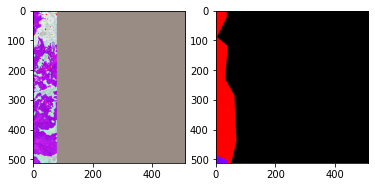

In [19]:
fig, ax = plt.subplots(1, 2)

augmented_img, target = next(iterator)
augmented_img = augmented_img[0]   # First element
augmented_img = augmented_img  # denormalize

target = np.array(target[0, ..., 0])   # First element (squeezing channel dimension)

print(np.unique(target))

target_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, 3):
    target_img[np.where(target == i)] = np.array(colors[i-1])[:3] * 255

ax[0].imshow(np.uint8(augmented_img))
ax[1].imshow(np.uint8(target_img))

plt.show()

In [20]:
vgg = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_h, img_w, 3))
vgg.summary()
for layer in vgg.layers:
  layer.trainable = 'False'

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
______________________________________________________________

In [21]:
def create_model(depth, start_f, num_classes):

    model = tf.keras.Sequential()

    # Encoder (the same we use for classification)
    # -------
    model.add(vgg)
    start_f = 256
        
    # Decoder
    # -------
    for i in range(depth):
        model.add(tf.keras.layers.UpSampling2D(2, interpolation='bilinear'))
        model.add(tf.keras.layers.Conv2D(filters=start_f,
                                         kernel_size=(3, 3),
                                         strides=(1, 1),
                                         padding='same'))
        model.add(tf.keras.layers.ReLU())

        start_f = start_f // 2

    # Prediction Layer
    # ----------------
    model.add(tf.keras.layers.Conv2D(filters=num_classes,
                                     kernel_size=(1, 1),
                                     strides=(1, 1),
                                     padding='same',
                                     activation='softmax'))
    
    return model

In [22]:
model = create_model(depth=5, 
                     start_f=8,
                     num_classes=3)

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 16, 16, 512)       14714688  
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 32, 32, 512)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 256)       1179904   
_________________________________________________________________
re_lu (ReLU)                 (None, 32, 32, 256)       0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 64, 64, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       295040    
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64, 64, 128)       0

In [23]:
# prepare model for training

# Optimization params
# -------------------

# Loss
# Sparse Categorical Crossentropy to use integers (mask) instead of one-hot encoded labels
loss = tf.keras.losses.SparseCategoricalCrossentropy() 
# learning rate
lr = 1e-4 #3
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
# -------------------

# Here we define the intersection over union for each class in the batch.
# Then we compute the final iou as the mean over classes
def meanIoU(y_true, y_pred, num_classes=3):
    # get predicted class from softmax
    y_pred = tf.expand_dims(tf.argmax(y_pred, -1), -1)

    per_class_iou = []

    for i in range(1, num_classes): # exclude the background class 0
      # Get prediction and target related to only a single class (i)
      class_pred = tf.cast(tf.where(y_pred == i, 1, 0), tf.float32)
      class_true = tf.cast(tf.where(y_true == i, 1, 0), tf.float32)
      intersection = tf.reduce_sum(class_true * class_pred)
      union = tf.reduce_sum(class_true) + tf.reduce_sum(class_pred) - intersection
    
      iou = (intersection + 1e-7) / (union + 1e-7)
      per_class_iou.append(iou)

    return tf.reduce_mean(per_class_iou)

# Validation metrics
# ------------------
metrics = [meanIoU] #['accuracy', meanIoU] 
# ------------------

# Compile Model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [24]:
import os
from datetime import datetime

cwd = os.getcwd()

exps_dir = os.path.join(cwd, 'drive/My Drive/Keras4_1/', 'multiclass_segmentation_experiments')
if not os.path.exists(exps_dir):
    os.makedirs(exps_dir)

now = datetime.now().strftime('%b%d_%H-%M-%S')

model_name = 'CNN'

exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)
    
callbacks = []

# Model checkpoint
# ----------------
ckpt_dir = os.path.join(exp_dir, 'ckpts')
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp_{epoch:02d}.ckpt'), 
                                                   save_weights_only=True)  # False to save the model directly
callbacks.append(ckpt_callback)
###Learning rate scheduler

def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.01*epoch)
tf.keras.callbacks.LearningRateScheduler(
    scheduler, verbose=0
)

callback_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)
callbacks.append(callback_lr)




# ---------------------------------
tb_dir = os.path.join(exp_dir, 'tb_logs')
if not os.path.exists(tb_dir):
    os.makedirs(tb_dir)
    
# By default shows losses and metrics for both training and validation
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir,
                                             profile_batch=0,
                                             histogram_freq=0)  # if 1 shows weights histograms
callbacks.append(tb_callback)

# Early Stopping
# --------------
early_stop = True
if early_stop:
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)
    callbacks.append(es_callback)

In [ ]:
print(len(dataset))

history = model.fit(x=train_dataset,
          epochs=100,  #### set repeat in training dataset
          steps_per_epoch=len(dataset)/bs,
          validation_data=valid_dataset,
          validation_steps=len(dataset_valid)/bs, 
          callbacks=callbacks)

history.history
# How to visualize Tensorboard

# 1. tensorboard --logdir EXPERIMENTS_DIR --port PORT     <- from terminal
# 2. localhost:PORT   <- in your browser

1439
Epoch 1/100
89/89 [==============================] - 263s 3s/step - loss: 0.1035 - meanIoU: 0.2643 - val_loss: 0.0690 - val_meanIoU: 0.4648
Epoch 2/100
89/89 [==============================] - 265s 3s/step - loss: 0.0874 - meanIoU: 0.4487 - val_loss: 0.0878 - val_meanIoU: 0.3020
Epoch 3/100
89/89 [==============================] - 263s 3s/step - loss: 0.0676 - meanIoU: 0.5397 - val_loss: 0.0606 - val_meanIoU: 0.5519
Epoch 4/100
89/89 [==============================] - 268s 3s/step - loss: 0.0589 - meanIoU: 0.6349 - val_loss: 0.0539 - val_meanIoU: 0.5987
Epoch 5/100
89/89 [==============================] - 273s 3s/step - loss: 0.0495 - meanIoU: 0.6891 - val_loss: 0.0526 - val_meanIoU: 0.6200
Epoch 6/100
89/89 [==============================] - 275s 3s/step - loss: 0.0464 - meanIoU: 0.7020 - val_loss: 0.0525 - val_meanIoU: 0.6217
Epoch 7/100
89/89 [==============================] - 273s 3s/step - loss: 0.0452 - meanIoU: 0.7038 - val_loss: 0.0531 - val_meanIoU: 0.5927
Epoch 8/100
89/

{'loss': [0.10345681756734848,
  0.08735200017690659,
  0.0675504058599472,
  0.05887492001056671,
  0.04950428381562233,
  0.0463937371969223,
  0.0451895147562027,
  0.042501308023929596,
  0.04093282297253609,
  0.03630950674414635,
  0.034637629985809326,
  0.03799576684832573,
  0.0373922623693943,
  0.03193460777401924,
  0.02950499951839447,
  0.02644716389477253,
  0.024920577183365822],
 'lr': [1e-04,
  1e-04,
  1e-04,
  1e-04,
  1e-04,
  1e-04,
  1e-04,
  1e-04,
  1e-04,
  1e-04,
  9.0483736e-05,
  8.1058424e-05,
  7.189237e-05,
  6.3128355e-05,
  5.4881155e-05,
  4.7236645e-05,
  4.0252413e-05],
 'meanIoU': [0.2642785310745239,
  0.44867467880249023,
  0.5396562814712524,
  0.6349468231201172,
  0.6891334652900696,
  0.7019645571708679,
  0.7038025259971619,
  0.7189384698867798,
  0.7301113605499268,
  0.7556020021438599,
  0.7633334398269653,
  0.7491997480392456,
  0.7536407709121704,
  0.7824012637138367,
  0.7977104187011719,
  0.8185362219810486,
  0.8258476257324219],

In [25]:
model.load_weights('/content/drive/MyDrive/Keras4_1/multiclass_segmentation_experiments/CNN_Dec21_09-19-47/ckpts/cp_12.ckpt')

In [27]:
from PIL import Image

test_dir = os.path.join(cwd,"Test_Dev")

crops = os.path.join(cwd, "Crops_Test")
if not os.path.exists(crops):
    os.makedirs(crops)
save_crops_dir = os.path.join(cwd, "Crops_Test/Images")
if not os.path.exists(save_crops_dir):
    os.makedirs(save_crops_dir)
save_crops_masks_dir = os.path.join(cwd, "Crops_Test/Masks")
if not os.path.exists(save_crops_masks_dir):
    os.makedirs(save_crops_masks_dir)

# in mask_reconstructed potrai guardare le maschere di output ricostruite
save_final_masks_dir = os.path.join(cwd, "Crops_Test/Masks_reconstructed")
if not os.path.exists(save_final_masks_dir):
    os.makedirs(save_final_masks_dir)
    
json_dir = os.path.join(cwd, "CONTENT")
if not os.path.exists(json_dir):
    os.makedirs(json_dir)

In [28]:
from pathlib import Path
from tensorflow.keras.applications.vgg16 import preprocess_input
i_file = 0
test_dir = os.path.join(cwd,"Test_Dev")
submission_dict = {}

# il json sarà salvato dentro alla cartella content

for subdir, dirs, files in os.walk(test_dir):
    for file in files:
        name_img = os.path.splitext(file)[0]
        #print(name_img)
        img_path = os.path.join(subdir, file)
        img = Image.open(os.path.join(subdir, file))
        w, h = img.size
        shape_img = (w,h)
        path = Path(subdir)

        if (str(path.parent.parent).split("/")[-1] == "Bipbip") & (str(path.parent).split("/")[-1] == "Haricot") :
            print("ENTRO")

            crop_dir = os.path.join(save_crops_dir, name_img)
            if not os.path.exists(crop_dir):
                os.makedirs(crop_dir)

            #CREO CROPS IMMAGINE 
            crop_mask_img_dir = os.path.join(save_crops_masks_dir, name_img)
            if not os.path.exists(crop_mask_img_dir):
                os.makedirs(crop_mask_img_dir)
            save_crops(img_path, save_dir = crop_dir, size = 512, overlap = 0, tipo = 'img')

            for c_subdir, c_dirs, c_files in os.walk(crop_dir):
                for crop in c_files:
                    name_crop = crop
                    name_save_crop = os.path.splitext(name_crop)[0]
                    crop_img = Image.open(os.path.join(crop_dir, crop))
                    size = crop_img.size[0]
                    crop = np.asarray(crop_img)
                    #VGG PREPROCESSING 
                    crop = preprocess_input(crop)

                    #PREDICO SU CROP
                    out_sigmoid = model.predict(x=tf.expand_dims(crop, 0))              
                    mask_arr = tf.argmax(out_sigmoid, -1)[0, ...] # (256, 256)
                    #print(mask_arr)
                    mask_arr = np.array(mask_arr)
                    
                    crop_mask_img = np.zeros([size,size,3],dtype=np.uint8)
                    for i in range (0, size):
                        for j in range (0, size):
                            #print(mask_arr[i][j])
                            if mask_arr[i][j] == 0:
                                crop_mask_img[i][j] = [0,0,0]
                            if mask_arr[i][j] == 1:
                                crop_mask_img[i][j] = [255,255,255]
                            if mask_arr[i][j] == 2:
                                crop_mask_img[i][j] = [216, 67, 82]
                        
                    crop_mask_img = Image.fromarray(crop_mask_img)

                    crop_mask_img.save(os.path.join(crop_mask_img_dir, name_save_crop +'.png'))
                    
            #esco dal ciclo dei crop, perchè ora ho tutte le maschere qui crop_mask_img_dir che vanno ricomposte
            final_mask = crops_reconstruct(crop_mask_img_dir, save_dir = save_final_masks_dir, final_size = (2048, 1536), size = 512, overlap = 0)
            final_mask_arr = np.asarray(final_mask)
            shape_final_size = final_mask.size
            #USO MAKE EQUAL
            final_mask_arr = make_equal(final_mask_arr, t1=10, t2=230)
            mask_arr = np.zeros([shape_final_size[1],shape_final_size[0]])
            for i in range (0, final_mask_arr.shape[0]):
                for j in range (0, final_mask_arr.shape[1]):
                    if (final_mask_arr[i][j][0] == 255): 
                        mask_arr[i][j] = 1
                    if (final_mask_arr[i][j][0] == 216): 
                        mask_arr[i][j] = 2

            print('new mask_arr shape, prima di json', mask_arr.shape)
            submission_dict[name_img] = {}
            submission_dict[name_img]['shape'] = mask_arr.shape
            submission_dict[name_img]['team'] = 'Bipbip'
            submission_dict[name_img]['crop'] = 'Haricot'
            submission_dict[name_img]['segmentation'] = {}

            rle_encoded_crop = rle_encode(mask_arr == 1)
            rle_encoded_weed = rle_encode(mask_arr == 2)

            submission_dict[name_img]['segmentation']['crop'] = rle_encoded_crop
            submission_dict[name_img]['segmentation']['weed'] = rle_encoded_weed


            with open(os.path.join(json_dir,'submission.json'), 'w') as f:
                i_file = i_file+1
                json.dump(submission_dict, f)
            print("json per 1 fatto")

        else:
            mask_arr = np.ones(shape_img) # Per le immagini non appartenenti a haricot faccio maschere nere

            submission_dict[name_img] = {}
            submission_dict[name_img]['shape'] = mask_arr.shape
            submission_dict[name_img]['team'] = str(path.parent.parent).split("/")[-1]
            submission_dict[name_img]['crop'] = str(path.parent).split("/")[-1]
            submission_dict[name_img]['segmentation'] = {}

            rle_encoded_crop = rle_encode(mask_arr == 1)
            rle_encoded_weed = rle_encode(mask_arr == 2)
            submission_dict[name_img]['segmentation']['crop'] = rle_encoded_crop
            submission_dict[name_img]['segmentation']['weed'] = rle_encoded_weed


            with open(os.path.join(json_dir,'submission.json'), 'w') as f:
                i_file = i_file+1
                json.dump(submission_dict, f)
f.close()

print("FINE")
print(i_file)
      
      
          
         

ENTRO
SALVO TOT
new mask_arr shape, prima di json (1536, 2048)
json per 1 fatto
ENTRO
SALVO TOT
new mask_arr shape, prima di json (1536, 2048)
json per 1 fatto
ENTRO
SALVO TOT
new mask_arr shape, prima di json (1536, 2048)
json per 1 fatto
ENTRO
SALVO TOT
new mask_arr shape, prima di json (1536, 2048)
json per 1 fatto
ENTRO
SALVO TOT
new mask_arr shape, prima di json (1536, 2048)
json per 1 fatto
ENTRO
SALVO TOT
new mask_arr shape, prima di json (1536, 2048)
json per 1 fatto
ENTRO
SALVO TOT
new mask_arr shape, prima di json (1536, 2048)
json per 1 fatto
ENTRO
SALVO TOT
new mask_arr shape, prima di json (1536, 2048)
json per 1 fatto
ENTRO
SALVO TOT
new mask_arr shape, prima di json (1536, 2048)
json per 1 fatto
ENTRO
SALVO TOT
new mask_arr shape, prima di json (1536, 2048)
json per 1 fatto
ENTRO
SALVO TOT
new mask_arr shape, prima di json (1536, 2048)
json per 1 fatto
ENTRO
SALVO TOT
new mask_arr shape, prima di json (1536, 2048)
json per 1 fatto
ENTRO
SALVO TOT
new mask_arr shape, prim